## Импорт датасета

Импортируем указанные библиотеки под сокращенным именем для удобства.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружаем наш подготовленный датасет.

In [2]:
df = pd.read_csv('Nikiforova_prep.csv', sep=';')
df

,square,type,staff,reviews,cars_per_day,average_income_of_customers,road,place_for_walk,coating_quality,spontaneous_trade,place_for_picnic,store_checks
0,9.00,1,2.0,42.820513,12679.0,14910.0,0.0,0.0,0.0,0.0,0.0,571.0
1,30.00,1,2.0,8.000000,12800.0,9030.0,0.0,0.0,0.0,0.0,0.0,1197.0
2,15.00,1,2.0,42.820513,77106.0,9030.0,0.0,0.0,0.0,0.0,0.0,402.0
3,20.00,1,2.0,42.820513,0.0,13930.0,0.0,0.0,0.0,0.0,0.0,1036.0
4,30.00,0,2.0,42.820513,0.0,14560.0,0.0,0.0,0.0,0.0,0.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62,51.77,1,6.0,4.000000,146.0,9800.0,1.0,0.0,0.0,0.0,0.0,6669.0
63,27.26,1,4.0,3.000000,6661.0,12600.0,0.0,0.0,0.0,0.0,0.0,2877.0
64,148.91,1,2.0,12.000000,9500.0,10570.0,0.0,1.0,0.0,0.0,0.0,2146.0
65,50.93,0,3.0,17.000000,0.0,12460.0,0.0,0.0,0.0,0.0,0.0,413.0


## Корреляционная матрица

Снова выведем эту матрицу, но уже с удалёнными переременными.

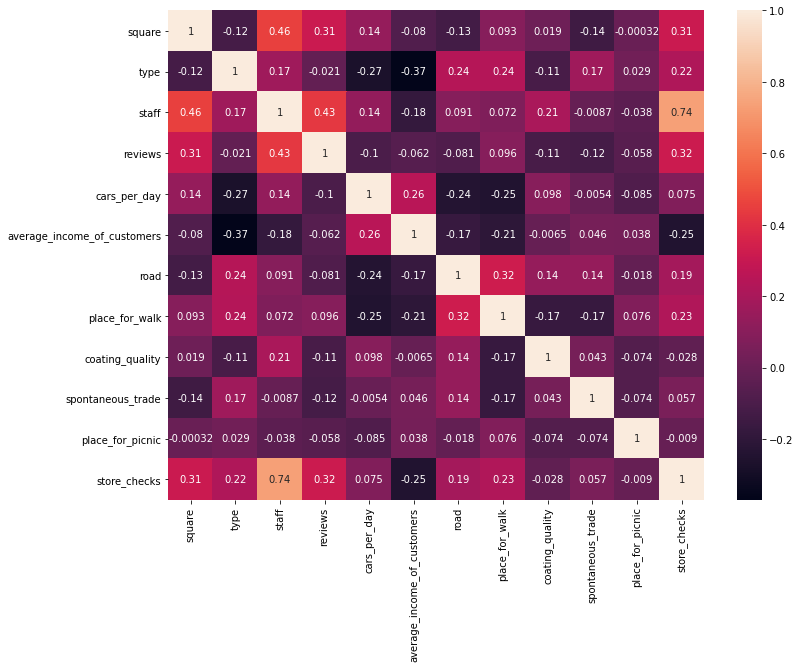

In [3]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Разбиение

Поделим датасет на обучающую train (80%) и тестовую test (20%) выборки. В Х запишем все переменные, кроме зависимой. У нас таковой является доход (store_checks). Его мы запишем в Y.

In [4]:
X = df.iloc[:, :-1]
y = df['store_checks']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Простая линейная регрессия

Количество сотрудников (staff) имеет самое сильное влияние на store_checks (см. Корреляционную матрицу), поэтому мы будем использовать её для простой линейной регрессии.

In [5]:
f1 = ['staff']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([862.66760895]), -96.2235571260303)

Прогнозируем данные для тестовой выборки.Вычисляем коэффициент детерминации. Видим, что он нормальный, пока нам не с чем сравнивать.

In [6]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3)

0.579

Теперь находим среднеквадратические ошибки для обучающей и тестовой выборки. Модель немного переобучена, но не критично.

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(1278.84, 1307.51)

Визуализируем результат. Видим, что модель плохо описывает данные. 

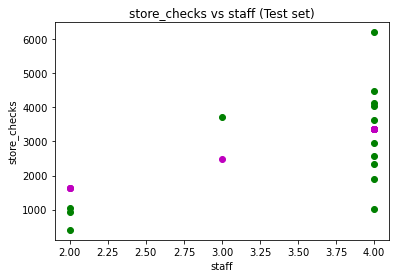

In [8]:
plt.scatter(X_test['staff'], y_test, color = 'green')
plt.plot(X_test['staff'], sr.predict(X_test[f1]), 'mo')
plt.title('store_checks vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

## Множественная линейная регрессия

Пробуем построить множественную линейную регрессию.Коєффициент детерминации увеличился на 10%, что является позитивным моментом.

In [9]:
mr = LinearRegression().fit(X_train, y_train)

mr.score(X_train, y_train).round(3)

0.67

Визуализируем результат. Модель уже гораздо лучше описывает данные.

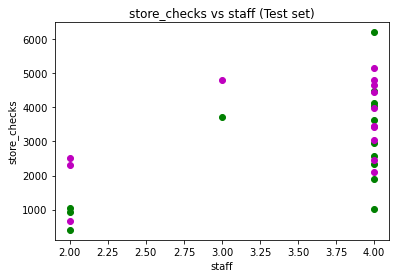

In [10]:
plt.scatter(X_test['staff'], y_test, color = 'green')
plt.plot(X_test['staff'], mr.predict(X_test), 'mo')
plt.title('store_checks vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

## p-values

С помощью данной операции выбираем наиболее значимые для нас переменные.

In [11]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           store_checks   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     7.560
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           6.68e-07
Time:                        13:16:33   Log-Likelihood:                -447.91
No. Observations:                  53   AIC:                             919.8
Df Residuals:                      41   BIC:                             943.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3535.5189   1850.411      1.911      0.063    -201.463    7272.501
square                         -8.6063      6.834     -1.259      0.215     -22.408       5.195
type                         -500.0122    452.786     -1.104      0.276   -1414.433     414.408
staff                         915.0291    144.984      6.311      0.000     622.228    1207.830
reviews                         0.1413      3.215      0.044      0.965      -6.351       6.633
cars_per_day                    0.0051      0.005      0.997      0.325      -0.005       0.015
average_income_of_customers    -0.2891      0.140     -2.065      0.045      -0.572      -0.006
road                          229.9279    450.999      0.510      0.613    -680.884    1140.740
place_for_walk                845.4889    583.837      1.448      0.155    -333.593    2024.571
coating_quality             -1192.2615    694.568     -1.717      0.094   -2594.969     210.446
spontaneous_trade            1218.6059    763.096      1.597      0.118    -322.497    2759.709
place_for_picnic             -357.6449    947.329     -0.378      0.708   -2270.815    1555.525
==============================================================================
Omnibus:                        1.257   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.204
Skew:                          -0.235   Prob(JB):                        0.548
Kurtosis:                       2.431   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Отобрали 3 наиболее значимых переменных-staff,average_income_of_customers,coating_quality.

In [12]:
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

Получили оптимизированную множественную линейную регрессию.

In [13]:
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

mr_rfe.coef_, mr_rfe.intercept_

(array([ 885.51288787,  662.38395584, -731.02957642]), -210.43228533902948)

Ниже представлен коэффицент детерминации полученной модели.

In [14]:
y_pred = mr_rfe.predict(X_test[f_lm])

mr_rfe.score(X_train[f_lm], y_train).round(3)

0.608

Среднеквадратическая ошибка по обучающей выборке снизилась, модель теперь не переобучается. Явно множественная линейная регрессия нам больше подходит.

In [15]:
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(1233.42, 1112.16)

Визуализация.

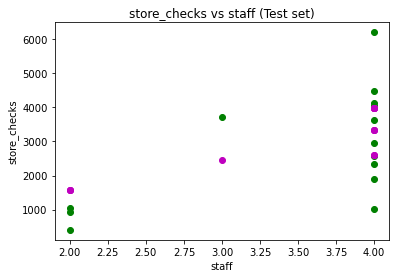

In [16]:
plt.scatter(X_test['staff'], y_test, color = 'green')
plt.plot(X_test['staff'], mr_rfe.predict(X_test[f_lm]), 'mo')
plt.title('  vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

## Backward Elimination

Если у нас было бы слишком много переменных, то метод ниже был бы спасением, так как он автоматически отбирает нужные переменные.

In [17]:
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.1
X_Modeled = backwardElimination(X_train, y_train, SL)

Получили почти такой же коэффициент детерминации.

In [18]:
mr_be = LinearRegression().fit(X_Modeled, y_train)

mr_be.score(X_Modeled, y_train).round(3)

0.579

## Полиномиальная регрессия

In [19]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

pr.coef_, pr.intercept_

(array([-1.27056711e+01,  1.07348868e+03, -1.35365346e+03, -2.21724387e+04,
         6.13142324e+02,  5.75603176e-01, -4.81817603e+00,  1.24580608e+04,
        -1.52237406e+03, -3.09291180e-01, -3.00312100e+00,  2.40870152e-05,
         4.42243644e-01,  3.69834229e+01, -2.98667154e+01,  5.53880173e-01,
         2.61711825e-04, -8.97217499e-02, -3.29981821e+01, -1.16387922e+02,
        -1.60530855e+02,  2.91910114e+02,  4.07639102e-06, -1.32313040e+03,
         7.78673922e+02,  2.57774008e+01,  2.54092181e-02, -3.26584661e-01,
        -1.27351627e+03, -1.81810189e+02, -1.93233955e+01,  1.22631401e+01,
        -1.69738600e-05,  1.09085934e+03,  1.06715761e+01, -9.56889891e-03,
         1.38153034e+00, -3.75092931e+02,  1.20345092e+03, -6.57274564e+01,
        -3.09433636e+01, -4.92476911e-05, -4.11707352e-01, -2.31997174e-04,
        -5.52586647e-02, -1.14547781e+02,  1.63026678e+02,  4.94411464e+00,
         4.09613070e+01, -5.68251258e-04,  4.04235315e-07, -4.68079324e-05,
        -1.7

Удалось значительно увеличить коэффициет детерминации.

In [20]:
y_pred = pr.predict(X_test_p)

pr.score(X_train_p, y_train).round(3)

0.996

Но модель теперь жутко преобучена, так как ошибка на тестовой в десятки раз больше.

In [21]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(119.99, 7443.36)

Визуализация.

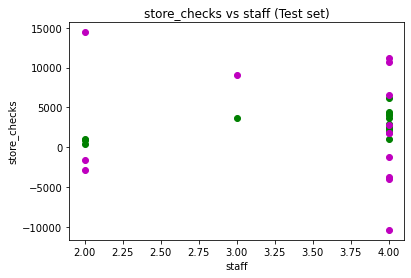

In [22]:
plt.scatter(X_test['staff'], y_test, color = 'green')
plt.plot(X_test['staff'], pr.predict(X_test_p), 'mo')
plt.title('store_checks vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

## Вывод: модель простой линейной регрессии слишком простая, она немного переобучена и имеет низкий коэффициент детерминации. Это логично, так как количество чеков вряд ли зависит только от количества сотрудников. Полиномиальная слишком переобучена, поэтому нет смысла её использовать, а вот множественная линейная регрессия как раз является сейчас оптимальным вариантом.

## Консервирование

In [23]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()